## Imported Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Reading insurance.xls file

In [4]:
data=pd.read_csv('insurance.csv')
data.head(17)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Each Column Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Statistical information for insurance.xls file

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Count Missing Values in Data

In [7]:
count_nan=data.isnull().sum()
count_nan[count_nan>0]

Series([], dtype: int64)

## Fill Missing Values by Mean of the Column

In [8]:
mean=data['bmi'].mean()
data['bmi'].fillna(mean,inplace=True)

In [9]:
count_nan.isnull()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Visualization for 'age' and 'bmi' columns using seaborn

## Info- Healthy range of bmi is 18.5 to 24.9.

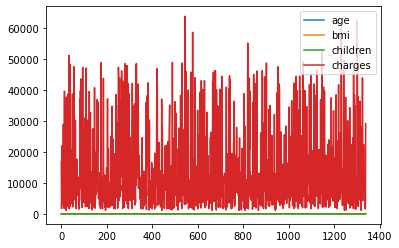

In [11]:
dataset2 = data[["age", "bmi", "children","charges"]]
dataset2.plot()

AttributeError: 'PathCollection' object has no property 'mode'

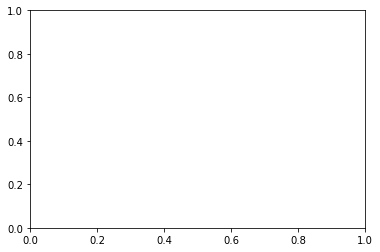

In [19]:
#sns.scatterplot(x='age',y='bmi',data=data,hue='smoker')
data.plot(kind='scatter', x='age', y='bmi', mode='markers')

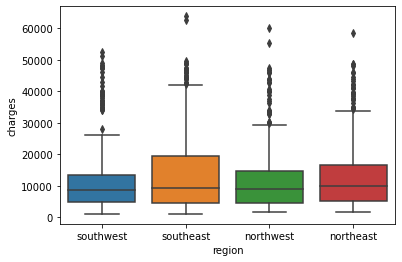

In [13]:
sns.boxplot(x='region',y='charges',data=data)

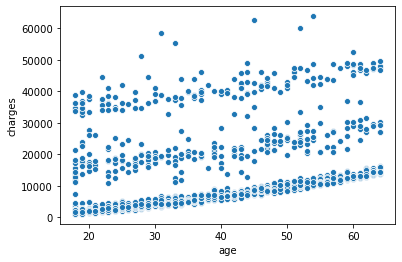

In [14]:
sns.scatterplot(x='age',y='charges',data=data)

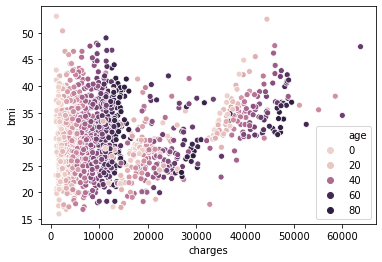

In [15]:
sns.scatterplot(x='charges',y='bmi',data=data,hue='age')

## Conclusion- people in data set are not that healthy as violating the bmi range
## All ages have variant bmi                   

## Giving labels to the data as 0 or 1

In [32]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

## To locate sex and smoker status in main data

In [33]:
data = pd.read_csv('insurance.csv')

In [34]:
sex_data = data.iloc[:,1:2].values

In [35]:
smoker_location = data.iloc[:,4:5].values

## Smoker data is divided into, if 'yes'=1, if 'no'=0

In [36]:
# creating initial dataframe
smoker_df = pd.DataFrame(smoker_location)

# Assigning numerical values and storing in another column
smoker_df['smoker_df_label'] = LabelEncoder().fit_transform(smoker_df)

In [55]:
smoker_df.head()

,0,smoker_df_label
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0


## Sex data is divided as female=0 and male=1

In [52]:
sex_df = pd.DataFrame(sex_data)

# Assigning numerical values and storing in another column
sex_df['sex_df_label'] = LabelEncoder().fit_transform(sex_df)

/Users/sohamshinde/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [54]:
sex_df.head()

,0,sex_df_label
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1


## LINEAR REGRESSION USING TRAIN_TEST_SPLIT

In [61]:
import seaborn as sns

In [62]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
X = data[['age', 'bmi']]
y = data[['charges']]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [77]:
len(X_test)

402

In [78]:
len(X_train)

936

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lm = LinearRegression()

In [115]:
lm.fit(X_train,y_train)

LinearRegression()

In [116]:
prediction = lm.predict(X_test)

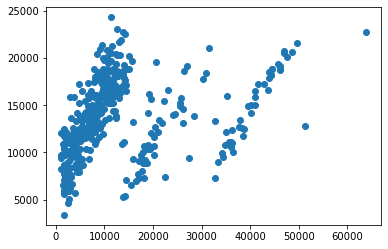

In [117]:
plt.scatter(y_test,prediction)

In [118]:
lm.intercept_

array([-6427.36836803])

In [105]:
lm.score(X_test,y_test)

0.12146846614497386

In [111]:
lm.coef_

array([[238.32842483, 345.03861116]])

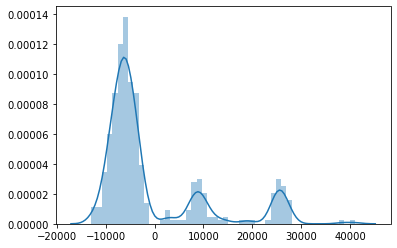

In [107]:
# Residual Plot
sns.distplot((y_test-prediction),bins=50)